In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from hcga.io import save_dataset
from hcga.graph import Graph, GraphCollection

if not Path("datasets").exists():
    os.mkdir("datasets")
if not Path("results").exists():
    os.mkdir("results")

%matplotlib inline

# Generate labelled random graphs

In [2]:
# defining number of nodes
n = 100

# number of graphs
num_g = 50

# number of node features
n_nf = 3

# empty list of graphs and labels
graphs = []
labels = []
node_features = []

# setting probability of edge existing for random graphs
p = 0.6

# setting number of edges to add per node
m = 4

In [3]:
# adding 50 random graphs (label 0)
for i in range(num_g):
    
    g = nx.fast_gnp_random_graph(n, p)
    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)
    node_features.append(node_feat_matrix)

    labels.append(0)

In [4]:
# adding 50 powerlaw cluster graphs (label 1)
for i in range(num_g):
    
    g = nx.powerlaw_cluster_graph(n, m, p)
    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)
    node_features.append(node_feat_matrix)

    labels.append(1)

In [5]:
# adding 50 watts strogatz graphs (label 2)
for i in range(num_g):
    
    g = nx.watts_strogatz_graph(n, m, p)
    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)
    node_features.append(node_feat_matrix)

    labels.append(2)

In [6]:
# create graph collection object
g_c = GraphCollection()

# add graphs, node features and labels to the object
g_c.add_graph_list(graphs, node_features, labels)

In [7]:
# perform some sanity checks

print("There are {} graphs".format(len(g_c.graphs)))
print("There are {} features per node".format(g_c.get_n_node_features()))

There are 150 graphs
There are 3 features per node


In [8]:
# we can save this if we want to and run everything from the command line

save_dataset(
    g_c,
    "labelled_graph_dataset",
    folder="./datasets/labelled_graph",
)

## Extracting features and generate feature matrix

In [9]:
# import hcga object
from hcga.hcga import Hcga

# define an object
h = Hcga()

In [10]:
# load previously saved dataset
h.load_data(
    "./datasets/labelled_graph/labelled_graph_dataset.pkl"
)

In [11]:
# extracting all features here
h.extract(mode="fast", n_workers=4, timeout=5)

# saving all features into a pickle
h.save_features("./results/labelled_graph/features.pkl")

INFO:hcga.extraction:Setting up feature classes...
100%|██████████| 43/43 [00:04<00:00,  9.91it/s]
INFO:hcga.extraction:Extracting features from 150 graphs (we disabled 0 graphs).
INFO:hcga.extraction:Computing features for 150 graphs:
100%|██████████| 150/150 [14:15<00:00,  5.70s/it]
INFO:hcga.extraction:1264 feature extracted.


In [12]:
h.features

feature_class         Cns                                           EF  \
feature_name  connectance connectance_N connectance_E local_efficiency   
0                0.599192      0.005992      0.000202         0.799500   
1                0.620808      0.006208      0.000202         0.810647   
2                0.590707      0.005907      0.000202         0.795415   
3                0.604848      0.006048      0.000202         0.803169   
4                0.593737      0.005937      0.000202         0.797144   
..                    ...           ...           ...              ...   
145              0.040404      0.000404      0.000202         0.050262   
146              0.040404      0.000404      0.000202         0.037000   
147              0.040404      0.000404      0.000202         0.093702   
148              0.040404      0.000404      0.000202         0.098778   
149              0.040404      0.000404      0.000202         0.083357   

feature_class                                                          \
feature_name  global_efficiency local_efficiency_N local_efficiency_E   
0                      0.799596           0.007995           0.000270   
1                      0.810404           0.008106           0.000264   
2                      0.795354           0.007954           0.000272   
3                      0.802424           0.008032           0.000268   
4                      0.796869           0.007971           0.000271   
..                          ...                ...                ...   
145                    0.330764           0.000503           0.000251   
146                    0.330444           0.000370           0.000185   
147                    0.326088           0.000937           0.000469   
148                    0.326288           0.000988           0.000494   
149                    0.327595           0.000834           0.000417   

feature_class                                                    RC  ...  \
feature_name  global_efficiency_N global_efficiency_E rich_club_k_1  ...   
0                        0.007996            0.000270      0.599192  ...   
1                        0.008104            0.000264      0.620808  ...   
2                        0.007954            0.000272      0.590707  ...   
3                        0.008024            0.000268      0.604848  ...   
4                        0.007969            0.000271      0.593737  ...   
..                            ...                 ...           ...  ...   
145                      0.003308            0.001654      0.040404  ...   
146                      0.003304            0.001652      0.040404  ...   
147                      0.003261            0.001630      0.040404  ...   
148                      0.003263            0.001631      0.040404  ...   
149                      0.003276            0.001638      0.040404  ...   

feature_class                 DM                                        \
feature_name  eccentricity_min_E eccentricity_sum_N eccentricity_sum_E   
0                       0.000674               2.00           0.067431   
1                       0.000651               2.00           0.065083   
2                       0.000684               2.00           0.068399   
3                       0.000668               2.00           0.066800   
4                       0.000681               2.00           0.068050   
..                           ...                ...                ...   
145                     0.020000               5.29           2.645000   
146                     0.025000               5.37           2.685000   
147                     0.020000               5.44           2.720000   
148                     0.025000               5.65           2.825000   
149                     0.025000               5.60           2.800000   

feature_class                                                              \
feature_name  eccentricity_max_N eccentricity_max_E eccent

## Classification and analysis

In [13]:
# load the saved features

h.load_features("./results/labelled_graph/features.pkl")

In [27]:
# implement a classification analyse of the features

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
h.analyse_features(
    compute_shap=False,
    model=model,
    feature_file="./results/labelled_graph/features.pkl",
    results_folder="./results/labelled_graph",
    save_model = True,
    plot=False,
)

INFO:hcga.analysis:1264 total features
INFO:hcga.analysis:0 graphs were removed for more than 0.3 fraction of bad features
INFO:hcga.analysis:957 valid features
INFO:hcga.analysis:957 with interpretability 1
INFO:hcga.analysis:Counts of graphs/label: 
label
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64
INFO:hcga.analysis:Using 10 splits
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Accuracy: 1.0 +/- 0.0
INFO:hcga.analysis:Fitting model to all data


In [22]:
accuracy_matrix, top_features = h.pairwise_classification(
    feature_file="./results/labelled_graph/features.pkl"
)

INFO:hcga.analysis:1264 total features
INFO:hcga.analysis:0 graphs were removed for more than 0.3 fraction of bad features
INFO:hcga.analysis:957 valid features
INFO:hcga.analysis:957 with interpretability 1
INFO:hcga.analysis:... Using Xgboost classifier ...
  0%|          | 0/3 [00:00<?, ?it/s]INFO:hcga.analysis:Pairwise classification between classes 0.0 and 1.0
INFO:hcga.analysis:Counts of graphs/label: 
label
0    50
1    50
Name: count, dtype: int64
INFO:hcga.analysis:Using 10 splits
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 0.8 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Accuracy: 0.98 +/- 0.06
 3

In [23]:
sns.heatmap(accuracy_matrix)
plt.show()

In [24]:
# what are the top features for classifying between class 0 and class 1?
print(top_features[(0.0, 1.0)])

['CM_communities_weighted_coverage_N', 'CM_communities_weighted_coverage_E', 'CM_communities_weighted_performance_N', 'CM_communities_performance_N', 'Cns_connectance']


# Generate unlabelled random graphs
Here we need to restart the kernel to ensure the extract feature step run successfully.

In [2]:
# defining limits on number of nodes
n = 100

# number of graphs
num_g = 5

# number of node features - in this example I will generate random node features that aren't useful for classifcation
n_nf = 3


# empty list of graphs and labels
graphs = []
node_features = []


# setting limits on probability of edge existing for random graphs
p = 0.6

# adding 20 random graphs (label 0)
for i in range(num_g):

    g = nx.fast_gnp_random_graph(n, p)
    g.label = 0

    node_feat_matrix = np.random.random((n, n_nf))

    for i, node in enumerate(g.nodes):
        g.nodes[node]["features"] = node_feat_matrix[i, :]

    # graphs.append(g)

    graphs.append(nx.to_numpy_array(g) * 2)

    node_features.append(node_feat_matrix)


# setting limits on number of edges to add per node
m = 4

# adding 20 powerlaw cluster graphs (label 1)
for i in range(num_g):

    g = nx.powerlaw_cluster_graph(n, m, p)
    g.label = 1

    node_feat_matrix = np.random.random((n, n_nf))

    for i, node in enumerate(g.nodes):
        g.nodes[node]["features"] = node_feat_matrix[i, :]

    # graphs.append(g)

    graphs.append(nx.to_numpy_array(g) * 2)
    node_features.append(node_feat_matrix)


# adding 20 watts strogatz graphs (label 2)
for i in range(num_g):

    g = nx.watts_strogatz_graph(n, m, p)
    g.label = 2

    node_feat_matrix = np.random.random((n, n_nf))

    for i, node in enumerate(g.nodes):
        g.nodes[node]["features"] = node_feat_matrix[i, :]

    # graphs.append(g)

    graphs.append(nx.to_numpy_array(g) * 2)
    node_features.append(node_feat_matrix)

In [3]:
# create graph collection object
graphs_unlabelled = GraphCollection()
graphs_unlabelled.add_graph_list(graphs, node_features)  # loaded without the labels

# save the unlabelled dataset
save_dataset(
    graphs_unlabelled, "unlabelled_graph_dataset", folder="./datasets/unlabelled_graph"
)

# perform some sanity checks
print(
    "There are {} graphs in the unlabelled dataset".format(
        len(graphs_unlabelled.graphs)
    )
)
print("There are {} features per node".format(graphs_unlabelled.get_n_node_features()))

There are 15 graphs in the unlabelled dataset
There are 3 features per node


## Extracting features and generate feature matrix

In [4]:
# import hcga object
from hcga.hcga import Hcga

# define an object
h = Hcga()

In [5]:
# extract features for the secondary dataset with no labels
h.load_data(
    "./datasets/unlabelled_graph/unlabelled_graph_dataset.pkl"
)

In [6]:
# extracting all features here
h.extract(mode="fast", n_workers=4, timeout=5)

# saving all features into a pickle
h.save_features("./results/unlabelled_graph/features.pkl")

INFO:hcga.extraction:Setting up feature classes...
100%|██████████| 43/43 [00:04<00:00, 10.12it/s]
INFO:hcga.extraction:Extracting features from 15 graphs (we disabled 0 graphs).
INFO:hcga.extraction:Computing features for 15 graphs:
100%|██████████| 15/15 [01:14<00:00,  4.99s/it]
INFO:hcga.extraction:1264 feature extracted.


In [7]:
h.features

feature_class         Cns                                           EF  \
feature_name  connectance connectance_N connectance_E local_efficiency   
0                0.609293      0.006093      0.000202         0.805204   
1                0.590909      0.005909      0.000202         0.795254   
2                0.593131      0.005931      0.000202         0.796146   
3                0.609899      0.006099      0.000202         0.804310   
4                0.602626      0.006026      0.000202         0.801198   
5                0.076768      0.000768      0.000202         0.565498   
6                0.076162      0.000762      0.000202         0.521184   
7                0.077374      0.000774      0.000202         0.527533   
8                0.077172      0.000772      0.000202         0.522168   
9                0.076970      0.000770      0.000202         0.490612   
10               0.040404      0.000404      0.000202         0.040690   
11               0.040404      0.000404      0.000202         0.091524   
12               0.040404      0.000404      0.000202         0.090726   
13               0.040404      0.000404      0.000202         0.070476   
14               0.040404      0.000404      0.000202         0.075762   

feature_class                                                          \
feature_name  global_efficiency local_efficiency_N local_efficiency_E   
0                      0.804646           0.008052           0.000267   
1                      0.795455           0.007953           0.000272   
2                      0.796566           0.007961           0.000271   
3                      0.804949           0.008043           0.000266   
4                      0.801313           0.008012           0.000269   
5                      0.458047           0.005655           0.001488   
6                      0.458232           0.005212           0.001382   
7                      0.458283           0.005275           0.001377   
8                      0.455539           0.005222           0.001367   
9                      0.461380           0.004906           0.001288   
10                     0.328370           0.000407           0.000203   
11                     0.324367           0.000915           0.000458   
12                     0.323747           0.000907           0.000454   
13                     0.329859           0.000705           0.000352   
14                     0.326162           0.000758           0.000379   

feature_class                                                    RC  ...  \
feature_name  global_efficiency_N global_efficiency_E rich_club_k_1  ...   
0                        0.008046            0.000267      0.609293  ...   
1                        0.007955            0.000272      0.590909  ...   
2                        0.007966            0.000271      0.593131  ...   
3                        0.008049            0.000267      0.609899  ...   
4                        0.008013            0.000269      0.602626  ...   
5                        0.004580            0.001205      0.076768  ...   
6                        0.004582            0.001215      0.076162  ...   
7                        0.004583            0.001197      0.077374  ...   
8                        0.004555            0.001193      0.077172  ...   
9                        0.004614            0.001211      0.076970  ...   
10                       0.003284            0.001642      0.040404  ...   
11                       0.003244            0.001622      0.040404  ...   
12                       0.003237            0.001619      0.040404  ...   
13                       0.003299            0.001649      0.040404  ...   
14                       0.003262            0.001631      0.040404  ...   

feature_class                 DM                                        \
feature_name  eccentricity_min_E eccentricity_sum_N eccentricity_sum_E   
0                       0.000663               2.00       

## Analyse by trained model and print the prediction

In [8]:
h.analyse_features(
    plot=False,
    trained_model="./results/labelled_graph/fitted_model",
    results_folder="./results/test",
)

INFO:hcga.analysis:1264 total features
INFO:hcga.analysis:0 graphs were removed for more than 0.3 fraction of bad features
INFO:hcga.analysis:956 valid features
INFO:hcga.analysis:956 with interpretability 1


ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [10]:
predictions = pd.read_csv("./results/test/prediction_results.csv", index_col=0)
print(predictions)

     y_prediction
0             0.0
1             0.0
2             0.0
3             0.0
4             0.0
..            ...
145           2.0
146           2.0
147           2.0
148           2.0
149           2.0

[150 rows x 1 columns]


## H Clustering

In [7]:
# implement a clustering analyse of the features
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3)
h.analyse_features(
    compute_shap=False,
    model=model,
    feature_file="./results/unlabelled_graph/features.pkl",
    results_folder="./results/unlabelled_graph",
    save_model = True,
    plot=False,
)

INFO:hcga.analysis:1264 total features
INFO:hcga.analysis:0 graphs were removed for more than 0.3 fraction of bad features
INFO:hcga.analysis:953 valid features
INFO:hcga.analysis:953 with interpretability 1


AttributeError: 'NoneType' object has no attribute 'value_counts'

In [54]:
h.features

feature_class         Cns                                           EF  \
feature_name  connectance connectance_N connectance_E local_efficiency   
0                0.600404      0.006004      0.000202         0.800179   
1                0.599394      0.005994      0.000202         0.799434   
2                0.609697      0.006097      0.000202         0.808597   
3                0.611515      0.006115      0.000202         0.807003   
4                0.605657      0.006057      0.000202         0.801957   
5                0.076970      0.000770      0.000202         0.490966   
6                0.077374      0.000774      0.000202         0.548490   
7                0.077374      0.000774      0.000202         0.537598   
8                0.076970      0.000770      0.000202         0.537787   
9                0.077172      0.000772      0.000202         0.522561   
10               0.040404      0.000404      0.000202         0.096349   
11               0.040404      0.000404      0.000202         0.078476   
12               0.040404      0.000404      0.000202         0.069452   
13               0.040404      0.000404      0.000202         0.043413   
14               0.040404      0.000404      0.000202         0.066056   

feature_class                                                          \
feature_name  global_efficiency local_efficiency_N local_efficiency_E   
0                      0.800202           0.008002           0.000269   
1                      0.799697           0.007994           0.000269   
2                      0.804848           0.008086           0.000268   
3                      0.805758           0.008070           0.000267   
4                      0.802828           0.008020           0.000267   
5                      0.463451           0.004910           0.001289   
6                      0.465354           0.005485           0.001432   
7                      0.469781           0.005376           0.001404   
8                      0.455724           0.005378           0.001412   
9                      0.459293           0.005226           0.001368   
10                     0.327248           0.000963           0.000482   
11                     0.325655           0.000785           0.000392   
12                     0.329714           0.000695           0.000347   
13                     0.331215           0.000434           0.000217   
14                     0.326081           0.000661           0.000330   

feature_class                                                    RC  ...  \
feature_name  global_efficiency_N global_efficiency_E rich_club_k_1  ...   
0                        0.008002            0.000269      0.600404  ...   
1                        0.007997            0.000270      0.599394  ...   
2                        0.008048            0.000267      0.609697  ...   
3                        0.008058            0.000266      0.611515  ...   
4                        0.008028            0.000268      0.605657  ...   
5                        0.004635            0.001216      0.076970  ...   
6                        0.004654            0.001215      0.077374  ...   
7                        0.004698            0.001227      0.077374  ...   
8                        0.004557            0.001196      0.076970  ...   
9                        0.004593            0.001202      0.077172  ...   
10                       0.003272            0.001636      0.040404  ...   
11                       0.003257            0.001628      0.040404  ...   
12                       0.003297            0.001649      0.040404  ...   
13                       0.003312            0.001656      0.040404  ...   
14                       0.003261            0.001630      0.040404  ...   

feature_class                 DM                                        \
feature_name  eccentricity_min_E eccentricity_sum_N eccentricity_sum_E   
0                       0.000673               2.00       

In [60]:
h_dropped = h.features.fillna(0)

In [62]:
from umap import UMAP
import plotly.express as px

umap_2a = UMAP(n_components=2, init='random', random_state=0)
umap_3d = UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2a.fit_transform(h_dropped)
proj_3d = umap_3d.fit_transform(h_dropped)

fig_2d = px.scatter(proj_2d, x=0, y=1)
fig_2d = px.scatter_3d(proj_3d, x=0, y=1, z=2)

fig_2d.show()
fig_3d.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [39]:
from umap import UMAP
import plotly.express as px

df = px.data.iris()

features = df.loc[:, :'petal_width']

umap_2d = UMAP(n_components=2, init='random', random_state=0)
umap_3d = UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df.species, labels={'color': 'species'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df.species, labels={'color': 'species'}
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [51]:
import pandas as pd

# Sample DataFrame with NaN values
data = {
    'A': [1, 2, None, 4, 5],
    'B': [6, None, 8, 9, 10],
    'C': [None, 12, 13, 14, 15]
}
df = pd.DataFrame(data)

# Remove rows with any NaN values
df_cleaned = df.dropna()
print("DataFrame after removing rows with NaN values:\n", df_cleaned)


DataFrame after removing rows with NaN values:
      A     B     C
3  4.0   9.0  14.0
4  5.0  10.0  15.0


In [56]:
h_dropped

feature_class         Cns                                           EF  \
feature_name  connectance connectance_N connectance_E local_efficiency   
0                0.600404      0.006004      0.000202         0.800179   
1                0.599394      0.005994      0.000202         0.799434   
2                0.609697      0.006097      0.000202         0.808597   
3                0.611515      0.006115      0.000202         0.807003   
4                0.605657      0.006057      0.000202         0.801957   
5                0.076970      0.000770      0.000202         0.490966   
6                0.077374      0.000774      0.000202         0.548490   
7                0.077374      0.000774      0.000202         0.537598   
8                0.076970      0.000770      0.000202         0.537787   
9                0.077172      0.000772      0.000202         0.522561   
10               0.040404      0.000404      0.000202         0.096349   
11               0.040404      0.000404      0.000202         0.078476   
12               0.040404      0.000404      0.000202         0.069452   
13               0.040404      0.000404      0.000202         0.043413   
14               0.040404      0.000404      0.000202         0.066056   

feature_class                                                          \
feature_name  global_efficiency local_efficiency_N local_efficiency_E   
0                      0.800202           0.008002           0.000269   
1                      0.799697           0.007994           0.000269   
2                      0.804848           0.008086           0.000268   
3                      0.805758           0.008070           0.000267   
4                      0.802828           0.008020           0.000267   
5                      0.463451           0.004910           0.001289   
6                      0.465354           0.005485           0.001432   
7                      0.469781           0.005376           0.001404   
8                      0.455724           0.005378           0.001412   
9                      0.459293           0.005226           0.001368   
10                     0.327248           0.000963           0.000482   
11                     0.325655           0.000785           0.000392   
12                     0.329714           0.000695           0.000347   
13                     0.331215           0.000434           0.000217   
14                     0.326081           0.000661           0.000330   

feature_class                                                    RC  ...  \
feature_name  global_efficiency_N global_efficiency_E rich_club_k_1  ...   
0                        0.008002            0.000269      0.600404  ...   
1                        0.007997            0.000270      0.599394  ...   
2                        0.008048            0.000267      0.609697  ...   
3                        0.008058            0.000266      0.611515  ...   
4                        0.008028            0.000268      0.605657  ...   
5                        0.004635            0.001216      0.076970  ...   
6                        0.004654            0.001215      0.077374  ...   
7                        0.004698            0.001227      0.077374  ...   
8                        0.004557            0.001196      0.076970  ...   
9                        0.004593            0.001202      0.077172  ...   
10                       0.003272            0.001636      0.040404  ...   
11                       0.003257            0.001628      0.040404  ...   
12                       0.003297            0.001649      0.040404  ...   
13                       0.003312            0.001656      0.040404  ...   
14                       0.003261            0.001630      0.040404  ...   

feature_class                 DM                                        \
feature_name  eccentricity_min_N eccentricity_min_E eccentricity_sum_N   
0                           0.02           0.000673       

In [63]:
import sys
print(sys.executable)  # This will show the Python executable being used
!pip list | grep nbformat


/Users/cherylshi/group_project/PoP_venv/bin/python
nbformat                  5.10.4


In [65]:
mapper = UMAP().fit(h_dropped)

In [67]:
import umap.plot

<Axes: >

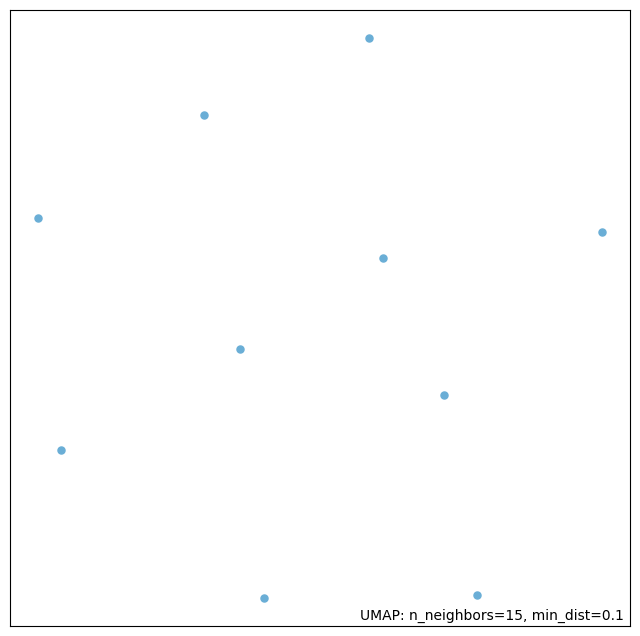

In [72]:
%matplotlib inline
umap.plot.points(mapper)

NameError: name 'pendigits' is not defined

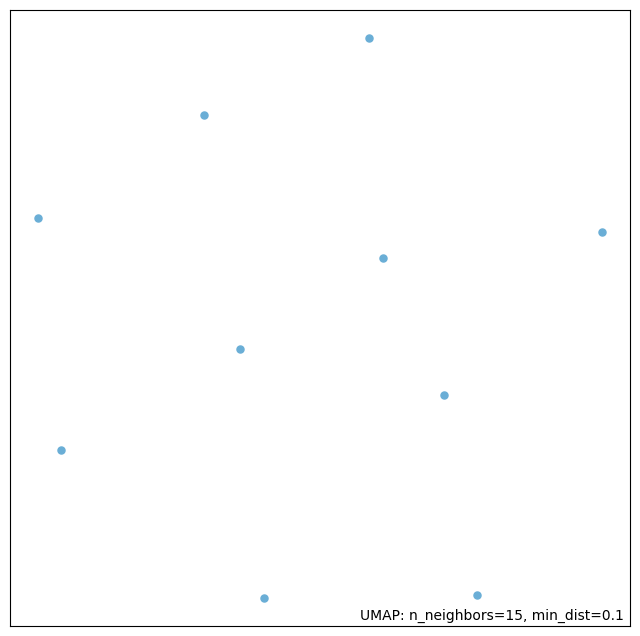

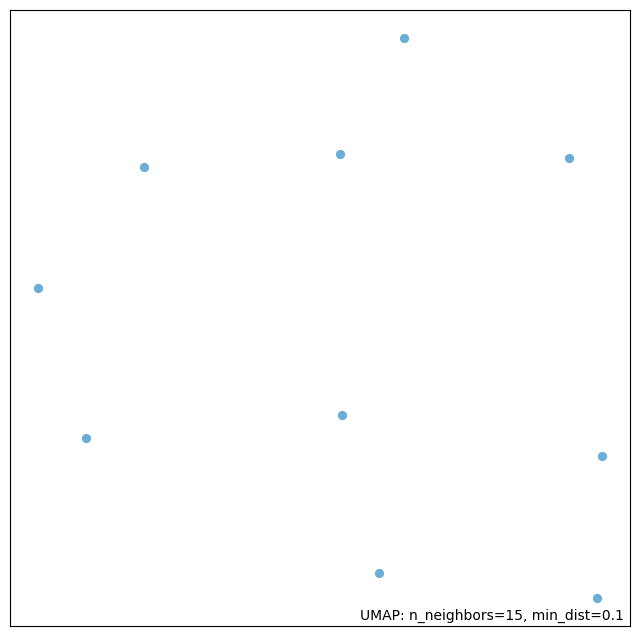

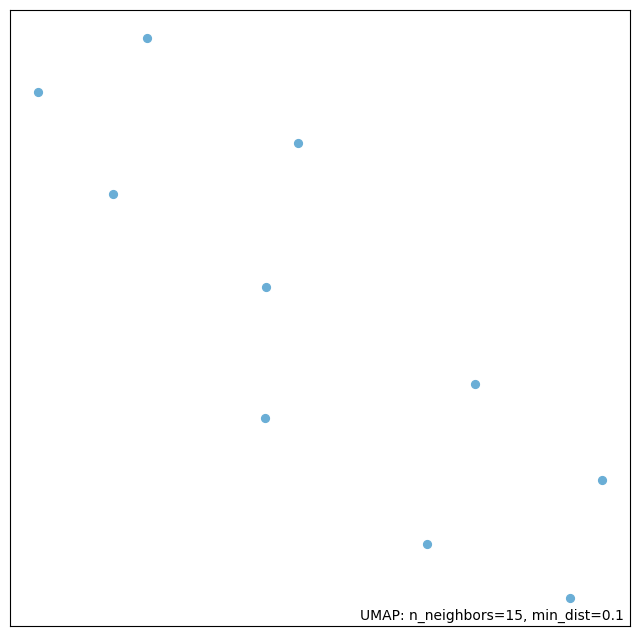

In [71]:
%matplotlib inline

# Import necessary libraries
import umap
import umap.plot
import pandas as pd
import matplotlib.pyplot as plt

# Sample data creation
data = pd.DataFrame({
    'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'y': [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
})

# Fit UMAP model
reducer = umap.UMAP()
embedding = reducer.fit_transform(data)

# Plot UMAP
umap.plot.points(reducer)

# Show the plot
plt.show()
